# Baseball case study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

# Input features: 
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

# Output: 
Number of predicted wins (W)

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("baseball.csv")
df                                           #loading the dataset

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# EDA (Exploratory Data Analysis):

In [3]:
df.columns                  #Displaying all the columns in the Baseball Dataset

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
#column names are in short form, so we will rename these columns by looking at the meanin of these columns on wikipedia
# Renaming the Columns with their full names to understand the Dataset better

df.rename({"R":"Runs","AB":"At Bats","H":"Hits","2B":"Doubles","3B":"Triples","HR":"Homeruns","BB":"Walks",
                 "SO":"Strikeouts","SB":"Stolen Bases","RA":"Runs Allowed","ER":"Earned Runs","ERA":"Earned Runs Average",
             "CG":"Shutouts","SHO":"Saves","SV":"Complete Games","E":"Errors"},axis=1,inplace=True)

In [5]:
df

,W,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Shutouts,Saves,Complete Games,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
df.columns                    # Displaying all the renamed columns in the Dataset

Index(['W', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Runs Average', 'Shutouts', 'Saves', 'Complete Games', 'Errors'],
      dtype='object')

# About Columns:

1.Wins: The number of games where the pitcher pitched while the team was in front and went on to win, and the starter has to pitch at least five innings.

2.Runs: Runs Scored:times reached home plate legally and safely.

3.At Bats: Not including bases on balls, being hit by a pitch, sacrifices, interference, or obstruction.

4.Hits: reaching base because of a batted, fair ball without error by the defense.

5.Doubles: hits on which the batter reaches second base safely without the contribution of a fielding error.

6.Triples: hits on which the batter reaches third base safely without the contribution of a fielding error.

7.Homeruns: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

8.Walks: hitter not swinging at four pitches called out of the strike zone and awarded first base.

9.Strikeouts: number of batters who received strike three.

10.Stolen Bases: number of bases advanced by the runner while the ball is in the possession of the defense.

11.Runs Allowed: number of runs allowed times nine divided by innings pitched.

12.Earned Runs: number of runs that did not occur as a result of errors or passed balls.

13.Earned Run Average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

14.Complete Games: number of games where player was the only pitcher for their team.

15.Shutouts: number of complete games pitched with no runs allowed.

16.Saves: The number of games in which the pitcher enters a game with the pitcher's team leading, finishes the game without surrendering the lead and is not the winning pitcher, and either (a) the lead was three runs or less when the pitcher entered the game; or (b) the potential tying runs were on base.

17.Errors: The number of times a fielder fails to make a play that he should have made with common effort, and the offense benefits as a result.

# Checking null Values

In [7]:
df.isnull().sum()

W                      0
Runs                   0
At Bats                0
Hits                   0
Doubles                0
Triples                0
Homeruns               0
Walks                  0
Strikeouts             0
Stolen Bases           0
Runs Allowed           0
Earned Runs            0
Earned Runs Average    0
Shutouts               0
Saves                  0
Complete Games         0
Errors                 0
dtype: int64

<AxesSubplot:>

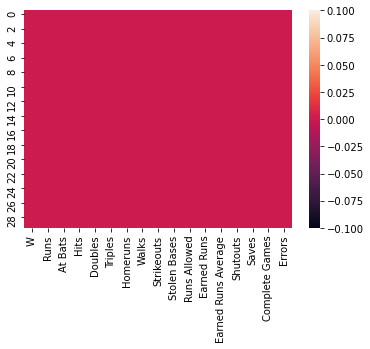

In [8]:
sns.heatmap(df.isnull())

We can see that there are no null values in any of column in our dataset

In [9]:
df.dtypes

W                        int64
Runs                     int64
At Bats                  int64
Hits                     int64
Doubles                  int64
Triples                  int64
Homeruns                 int64
Walks                    int64
Strikeouts               int64
Stolen Bases             int64
Runs Allowed             int64
Earned Runs              int64
Earned Runs Average    float64
Shutouts                 int64
Saves                    int64
Complete Games           int64
Errors                   int64
dtype: object

In [10]:
df.info()

# Displaying the Data Type and null values of every column of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   W                    30 non-null     int64  
 1   Runs                 30 non-null     int64  
 2   At Bats              30 non-null     int64  
 3   Hits                 30 non-null     int64  
 4   Doubles              30 non-null     int64  
 5   Triples              30 non-null     int64  
 6   Homeruns             30 non-null     int64  
 7   Walks                30 non-null     int64  
 8   Strikeouts           30 non-null     int64  
 9   Stolen Bases         30 non-null     int64  
 10  Runs Allowed         30 non-null     int64  
 11  Earned Runs          30 non-null     int64  
 12  Earned Runs Average  30 non-null     float64
 13  Shutouts             30 non-null     int64  
 14  Saves                30 non-null     int64  
 15  Complete Games       30 non-null     int64

<AxesSubplot:>

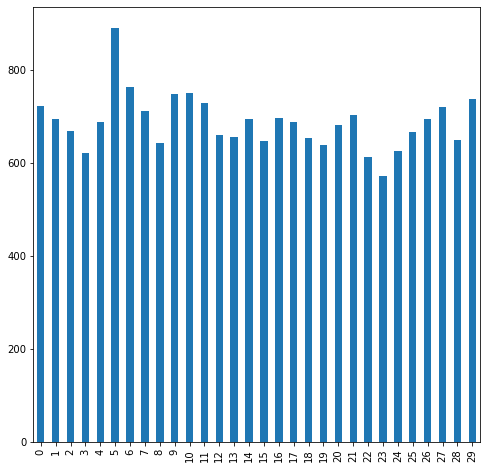

In [11]:
plt.figure(figsize=(8,8))
df["Runs"].plot.bar()

# In the Baseball Runs column we can see the most runs scored are more than 800 runs  
# In the Baseball Runs column we can see the least runs scored are close to 600 runs 

In the  Runs column we can see the maximum runs scored are more than 900 and minimum runs scored are less than 600

<AxesSubplot:>

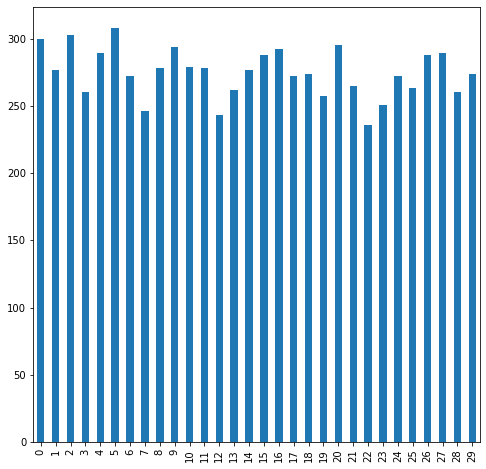

In [12]:
plt.figure(figsize=(8,8))
df["Doubles"].plot.bar()

The maximum number of Doubles Scored are more than 300 and minimum number of Doubles Scored are close to 230

<AxesSubplot:>

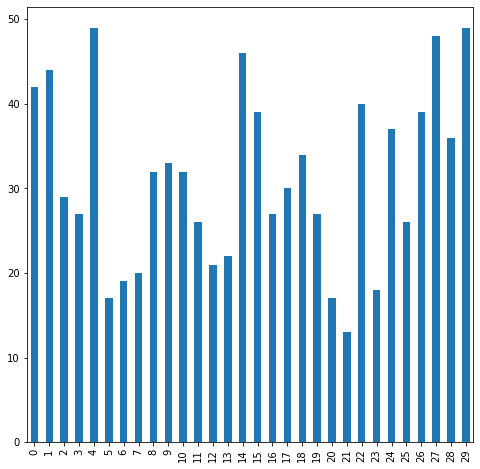

In [13]:
plt.figure(figsize=(8,8))
df["Triples"].plot.bar()

The maximum number of Triples Scored are close to 50 and minimum number of Triples Scored are close to 15

<AxesSubplot:>

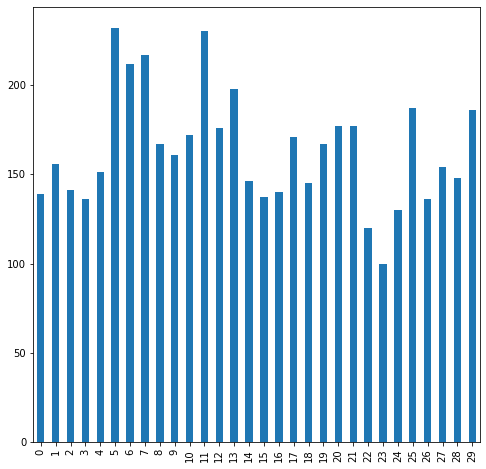

In [14]:
plt.figure(figsize=(8,8))
df["Homeruns"].plot.bar()

Maximum number of Home Runs hit are more than 250 and minimum number of Home Runs hit are close to 100

<AxesSubplot:>

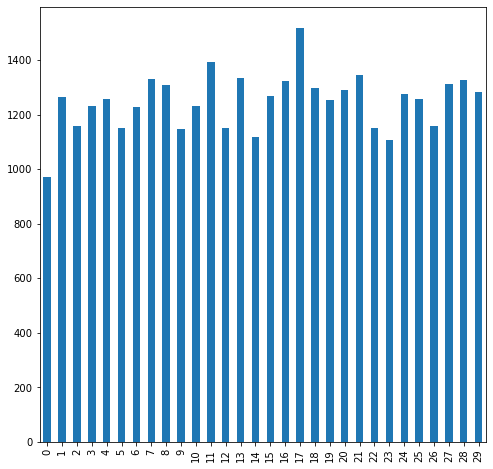

In [15]:
plt.figure(figsize=(8,8))
df["Strikeouts"].plot.bar()

The Highest Strikeouts are close to 1500 The lowest is close to 1000

<AxesSubplot:>

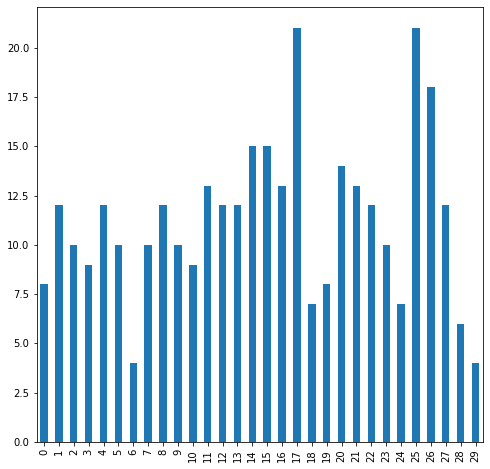

In [16]:
plt.figure(figsize=(8,8))
df["Saves"].plot.bar()

The maximum saves are close to 23 and the minimum saves are close to 4

# Correlation:

In [17]:
df.corr()               # Displaying the Correlation of all the independent variables with the Target Variable

,W,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Shutouts,Saves,Complete Games,Errors
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [18]:
df_corr=df.corr()
df_corr

,W,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Shutouts,Saves,Complete Games,Errors
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

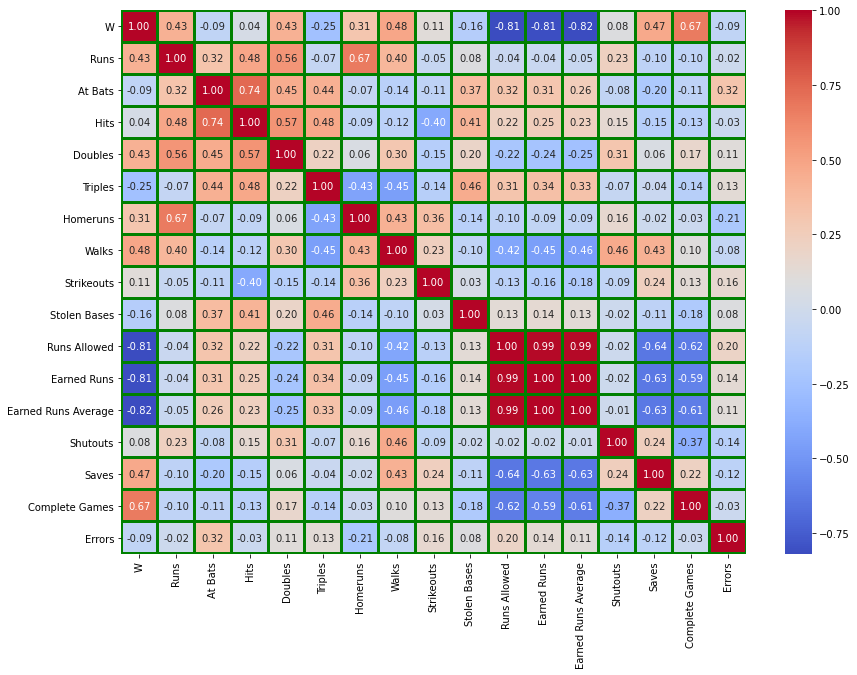

In [19]:
plt.figure(figsize=(14,10))
sns.heatmap(df_corr,annot=True,linewidths=2, cmap='coolwarm',fmt='0.2f',linecolor='green' )

# Outcome of correlation:

All columns are positively correlated with the target column.

complete games,Saves, Runs, Doubles, Walks have 67, 47, 43, 43, 48 percent of correlation with target column which can be considered as strong bond.

Homeruns, Strikeouts, Hits have 31, 11, and 4 percent of correlation with target column which can considered as good bond.

Whereas At bats, Triples, Stolen Bases, Runs allowed, Earned Runs, Earned Run Average, Errors have slight negative correlation.

Max correlation: Complete Games

Min correlation: Earned Run Average

# Describing datasets with heatmap:

In [20]:
df.describe()

,W,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Shutouts,Saves,Complete Games,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


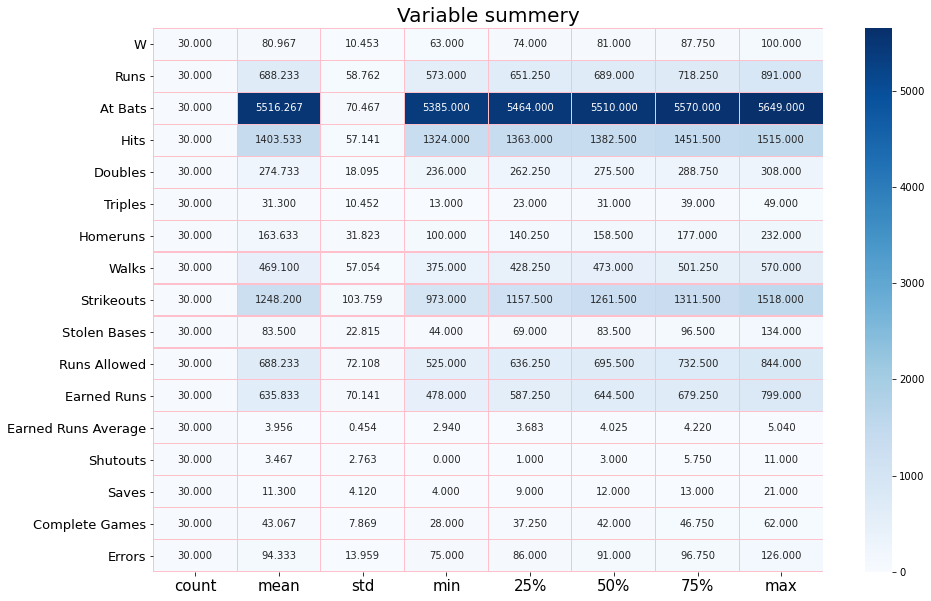

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe().transpose(),annot=True,fmt='.3f',linewidth=0.1,cmap='Blues',linecolor='pink')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title('Variable summery', fontsize=20)
plt.show()

# Outcome of describe of datasets:
From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help in data cleaning.

Total number of rows and columns in dataset:

        1.30 rows

        2.17 columns

Runs:

    1.Mean=688.23
    
    2.std.=58.76

    3.max_value=891.00

    4.min_value=573.00

At Bats:

    1.Mean=5516.27

    2.std.=70.47

    3.max_value=5649.00

    4.min_value=5385.00

Hits:

    1.Mean=1403.53

    2.std.=57.14

    3.max_value=1515.00

    4.min_value=1324.00

Doubles:

    1.Mean=274.73

    2.std.=18.10

    3.max_value=308.00

    4.min_value=236.00

Triples:

    1.Mean=31.30

    2.std.=10.45

    3.max_value=49.00

    4.min_value=13.00

Homeruns:

    1.Mean=163.63

    2.std.=31.82

    3.max_value=232.00

    4.min_value=100.00

Walks:

    1.Mean=469.10

    2.std.=57.05

    3.max_value=570.00

    4.min_value=375.00

Strikeouts:

    1.Mean=1248.20

    2.std.=103.76

    3.max_value=1518.00

    4.min_value=973.00

Stolen Bases:

    1.Mean=83.50

    2.std.=22.82

    3.max_value=134.00

    4.min_value=44.00

Runs Allowed:

    1.Mean=688.23

    2.std.=72.11

    3.max_value=844.00

    4.min_value=525.00

Earned Runs:

    1.Mean=635.83

    2.std.=70.14

    3.max_value=799.00

    4.min_value=478.00

Earned Run Average:

    1.Mean=3.96

    2.std.=0.45

    3.max_value=5.04

    4.min_value=2.94

Complete Games:

    1.Mean=3.47

    2.std.=2.76

    3.max_value=11.00

    4.min_value=0.00

Shutouts:

    1.Mean=11.30

    2.std.=4.12

    3.max_value=21.00

    4.min_value=4.00

Saves:

    1.Mean=43.07

    2.std.=7.88

    3.max_value=62.00

    4.min_value=28.00

Errors:

    1.Mean=94.33

    2.std.=13.96

    3.max_value=126.00

    4.min_value=75.00

Wins:

    1.Mean=80.97

    2.std.=10.45

    3.max_value=100.00

    4.min_value=63.00

Wins is our target column.

# Outlier Detection:

In [22]:
df.columns

Index(['W', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Runs Average', 'Shutouts', 'Saves', 'Complete Games', 'Errors'],
      dtype='object')

In [23]:
#univariate analysis

<AxesSubplot:>

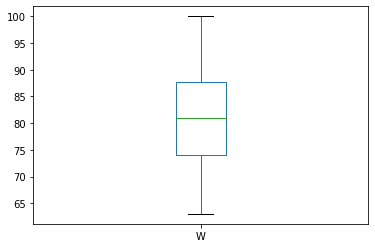

In [24]:
df['W'].plot.box()            #no outliers in our target column

<AxesSubplot:>

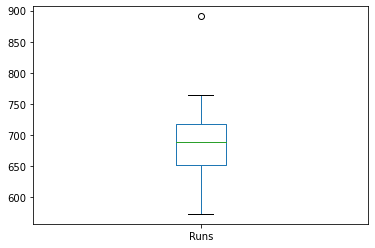

In [25]:
df['Runs'].plot.box()                     #we can see that we have only few outlier in this column

<AxesSubplot:>

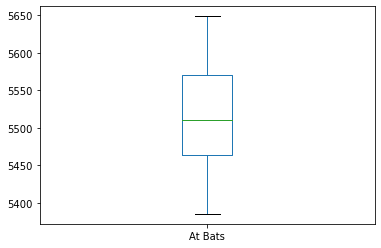

In [26]:
df['At Bats'].plot.box()              #there are no outliers in this column

<AxesSubplot:>

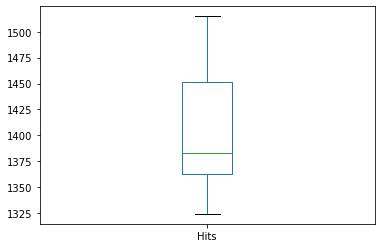

In [27]:
df['Hits'].plot.box()                   #there are no outliers in this column

<AxesSubplot:>

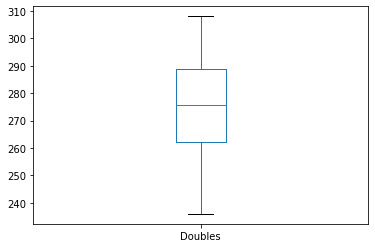

In [28]:
df['Doubles'].plot.box()                    #there are no outliers in this column

<AxesSubplot:>

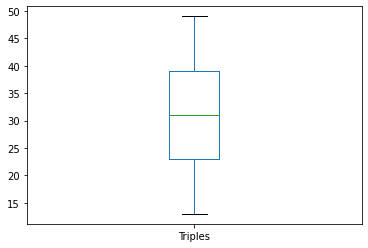

In [29]:
df['Triples'].plot.box()                             #there are no outliers in this column

<AxesSubplot:>

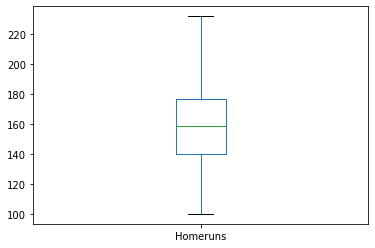

In [30]:
df['Homeruns'].plot.box()                        #there are no outliers in this column

<AxesSubplot:>

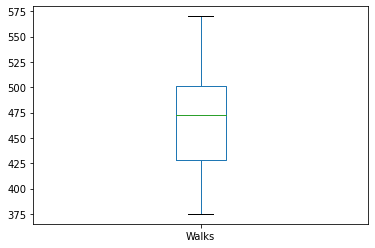

In [31]:
df['Walks'].plot.box()                  #there are no outliers in this column

<AxesSubplot:>

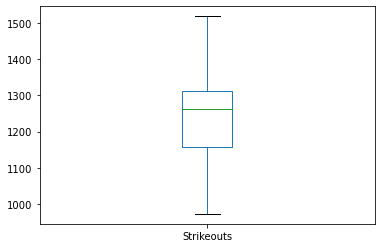

In [32]:
df['Strikeouts'].plot.box()                    #there are no outliers in this column

<AxesSubplot:>

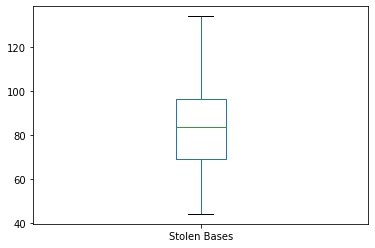

In [33]:
df['Stolen Bases'].plot.box()                   #there are no outliers in this column

<AxesSubplot:>

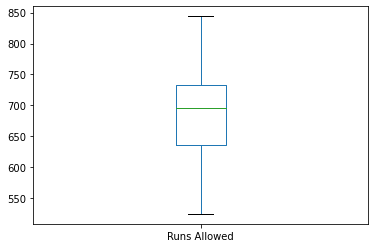

In [34]:
df['Runs Allowed'].plot.box()                      #there are no outliers in this column

<AxesSubplot:>

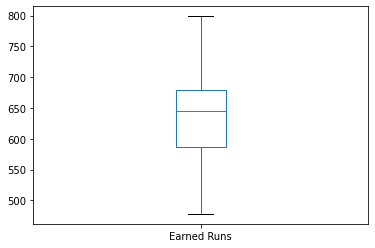

In [35]:
df['Earned Runs'].plot.box()                       #there are no outliers in this column

<AxesSubplot:>

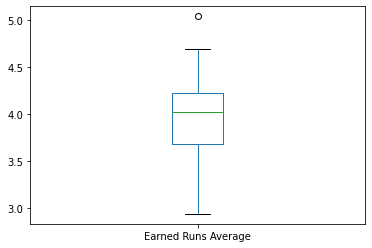

In [36]:
df['Earned Runs Average'].plot.box()                  #there are few outliers in this column

<AxesSubplot:>

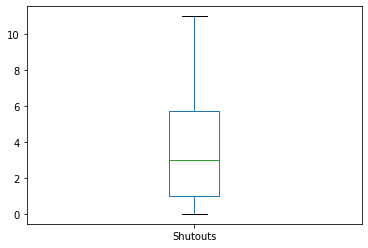

In [37]:
df['Shutouts'].plot.box()                              #there are no outliers in this column

<AxesSubplot:>

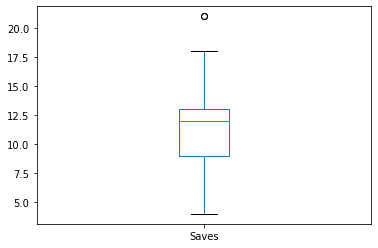

In [38]:
df['Saves'].plot.box()                              #there are few outliers in this column

<AxesSubplot:>

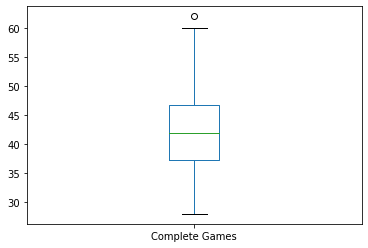

In [39]:
df['Complete Games'].plot.box()                     #there are few outliers in this column

<AxesSubplot:>

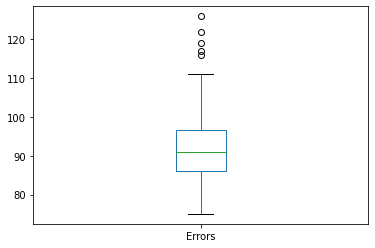

In [40]:
df['Errors'].plot.box()                               #there are few outliers in this column

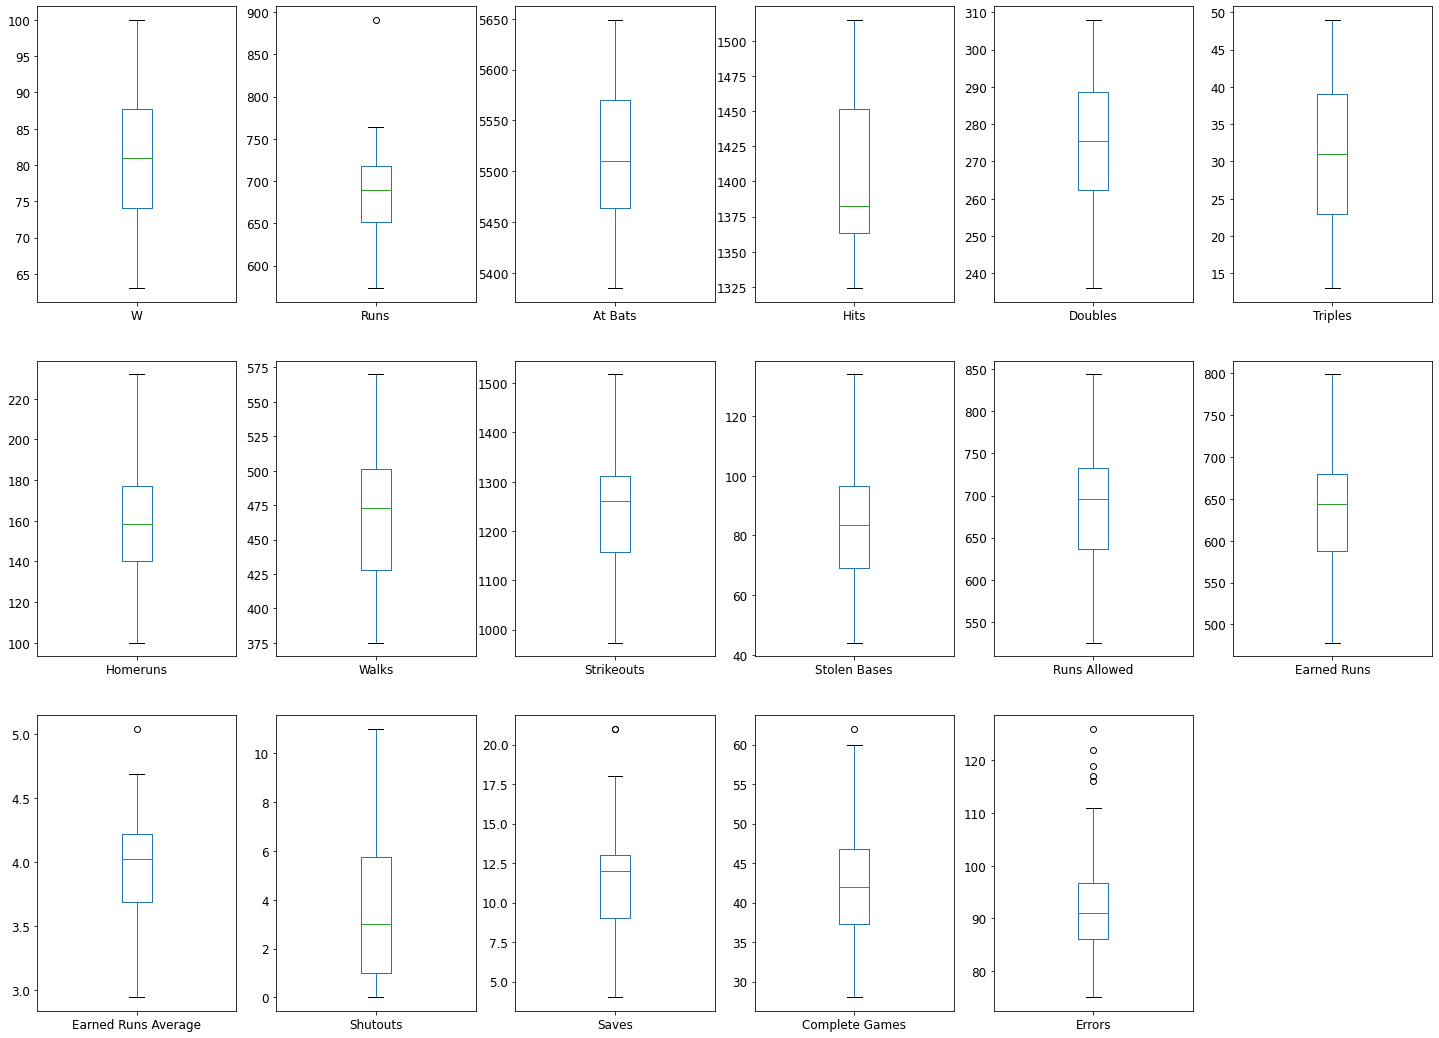

In [41]:
df.plot(kind="box", subplots=True, layout=(4,6), figsize=(25,25), fontsize=12)
plt.show()

# The Subplot shows boxplots of all the variable at once without passing boxplot function individually for each variable

From above observation we can see that columns- Runs, Earned Runs Average, Saves Complete Games and Errors has outliers 
our target column Wins has no outliers in it

# Checking distribution skewness:

In [42]:
df.skew()

W                      0.047089
Runs                   1.200786
At Bats                0.183437
Hits                   0.670254
Doubles               -0.230650
Triples                0.129502
Homeruns               0.516441
Walks                  0.158498
Strikeouts            -0.156065
Stolen Bases           0.479893
Runs Allowed           0.045734
Earned Runs            0.058710
Earned Runs Average    0.053331
Shutouts               0.736845
Saves                  0.565790
Complete Games         0.657524
Errors                 0.890132
dtype: float64

We are taking Skewness threshold as +/-0.5. From above, columns which fall under skewness:

Runs=1.200786

Hits=0.670254 

Shutouts=0.736845 

COmplete Games=0.657524,

Saves=0.565790

Errors=0.890132

<AxesSubplot:xlabel='Runs', ylabel='Density'>

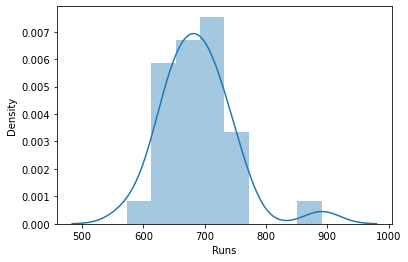

In [43]:
sns.distplot(df["Runs"])

# The Runs column has high skewness towards the right

<AxesSubplot:xlabel='Hits', ylabel='Density'>

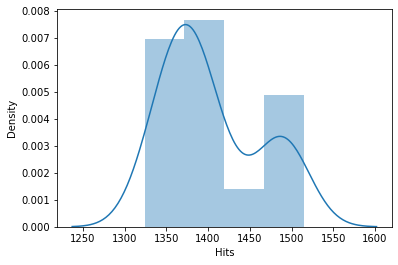

In [44]:
sns.distplot(df["Hits"])

# The Hits column has high skewness towards the right

<AxesSubplot:xlabel='Homeruns', ylabel='Density'>

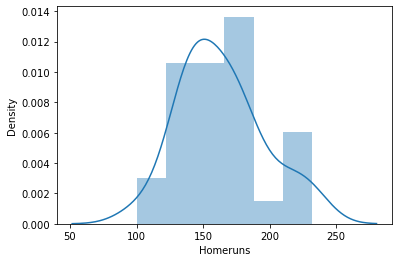

In [45]:
sns.distplot(df["Homeruns"])

# The Homeruns column has slightly high skewness towards the right

<AxesSubplot:xlabel='Shutouts', ylabel='Density'>

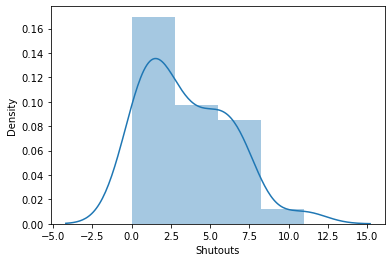

In [46]:
sns.distplot(df["Shutouts"])

# The Shutouts column has slightly high skewness towards the right

<AxesSubplot:xlabel='Saves', ylabel='Density'>

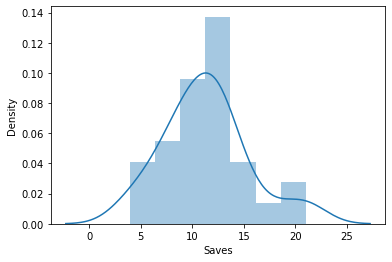

In [47]:
sns.distplot(df["Saves"])

# The Saves column has slightly high skewness towards the right

<AxesSubplot:xlabel='Complete Games', ylabel='Density'>

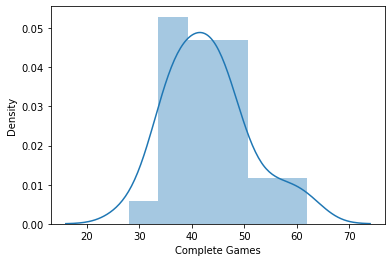

In [48]:
sns.distplot(df["Complete Games"])

# The Complete Games column has slightly high skewness towards the right

<AxesSubplot:xlabel='Errors', ylabel='Density'>

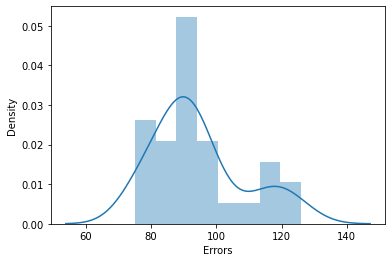

In [49]:
sns.distplot(df["Errors"])

# The Errors column has slightly high skewness towards the right

<AxesSubplot:xlabel='At Bats', ylabel='Density'>

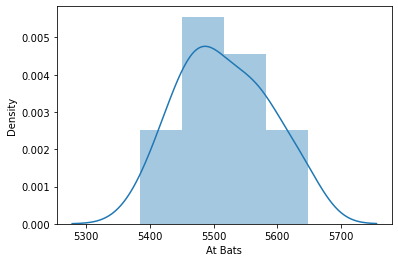

In [50]:
sns.distplot(df["At Bats"])

# The At Bats colun data is distributed normally

<AxesSubplot:xlabel='Doubles', ylabel='Density'>

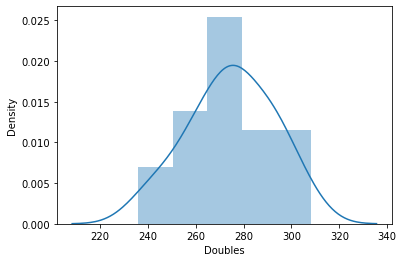

In [51]:
sns.distplot(df["Doubles"])

# The data is distributed normally within this column

<AxesSubplot:xlabel='Triples', ylabel='Density'>

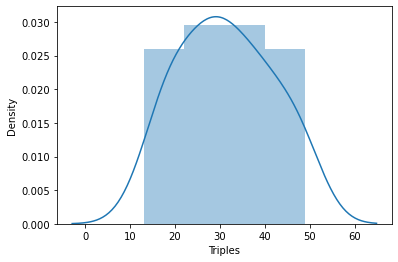

In [52]:
sns.distplot(df["Triples"])
# The data is distributed normally within this column

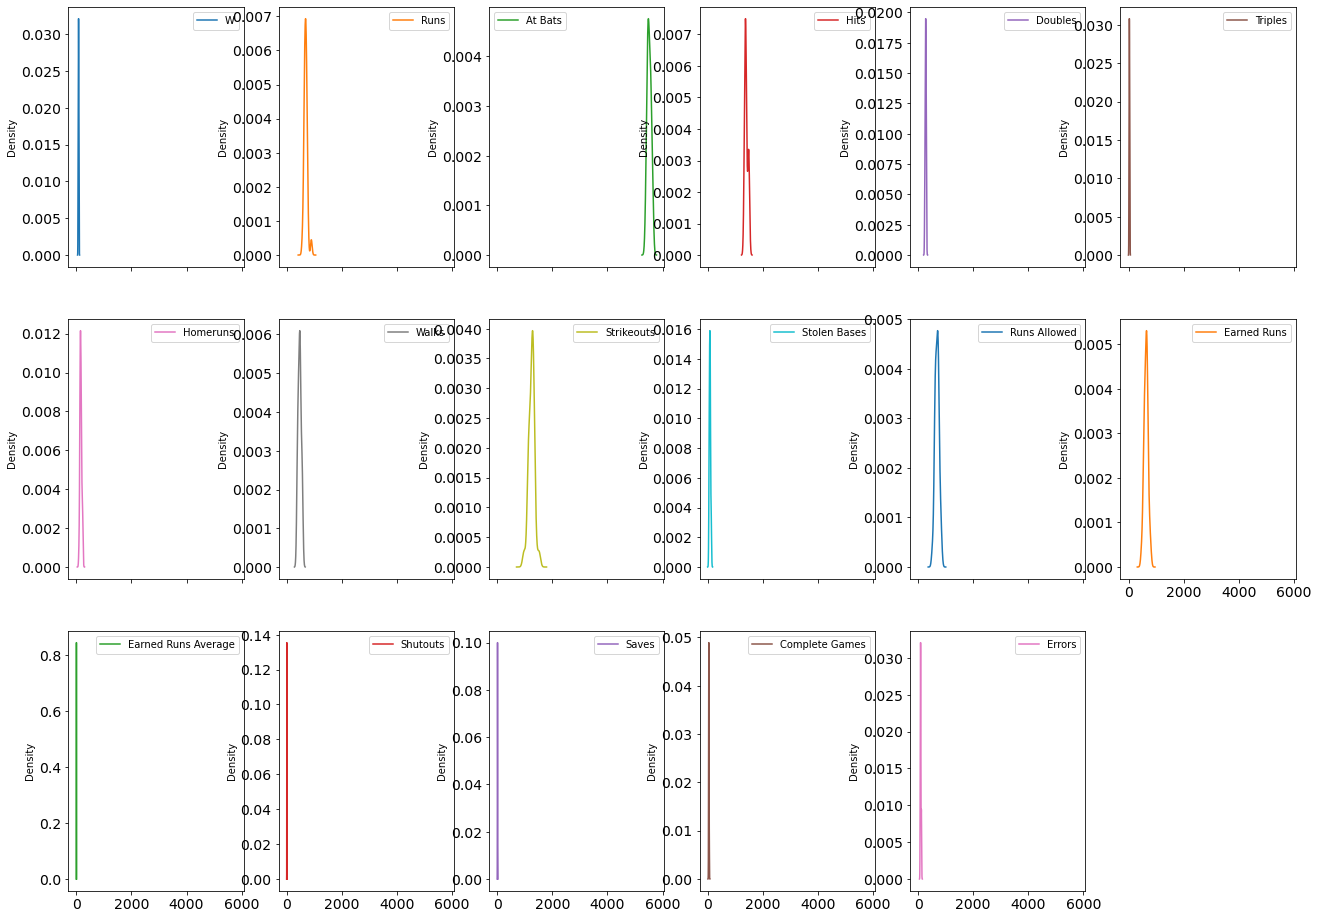

In [53]:
df.plot(kind='kde',subplots=True,layout=(4,6),figsize=(22,22),fontsize=14)
plt.show()

# Plotting the Skewness of all variables in dataset with subplots

# Multivariate analysis:

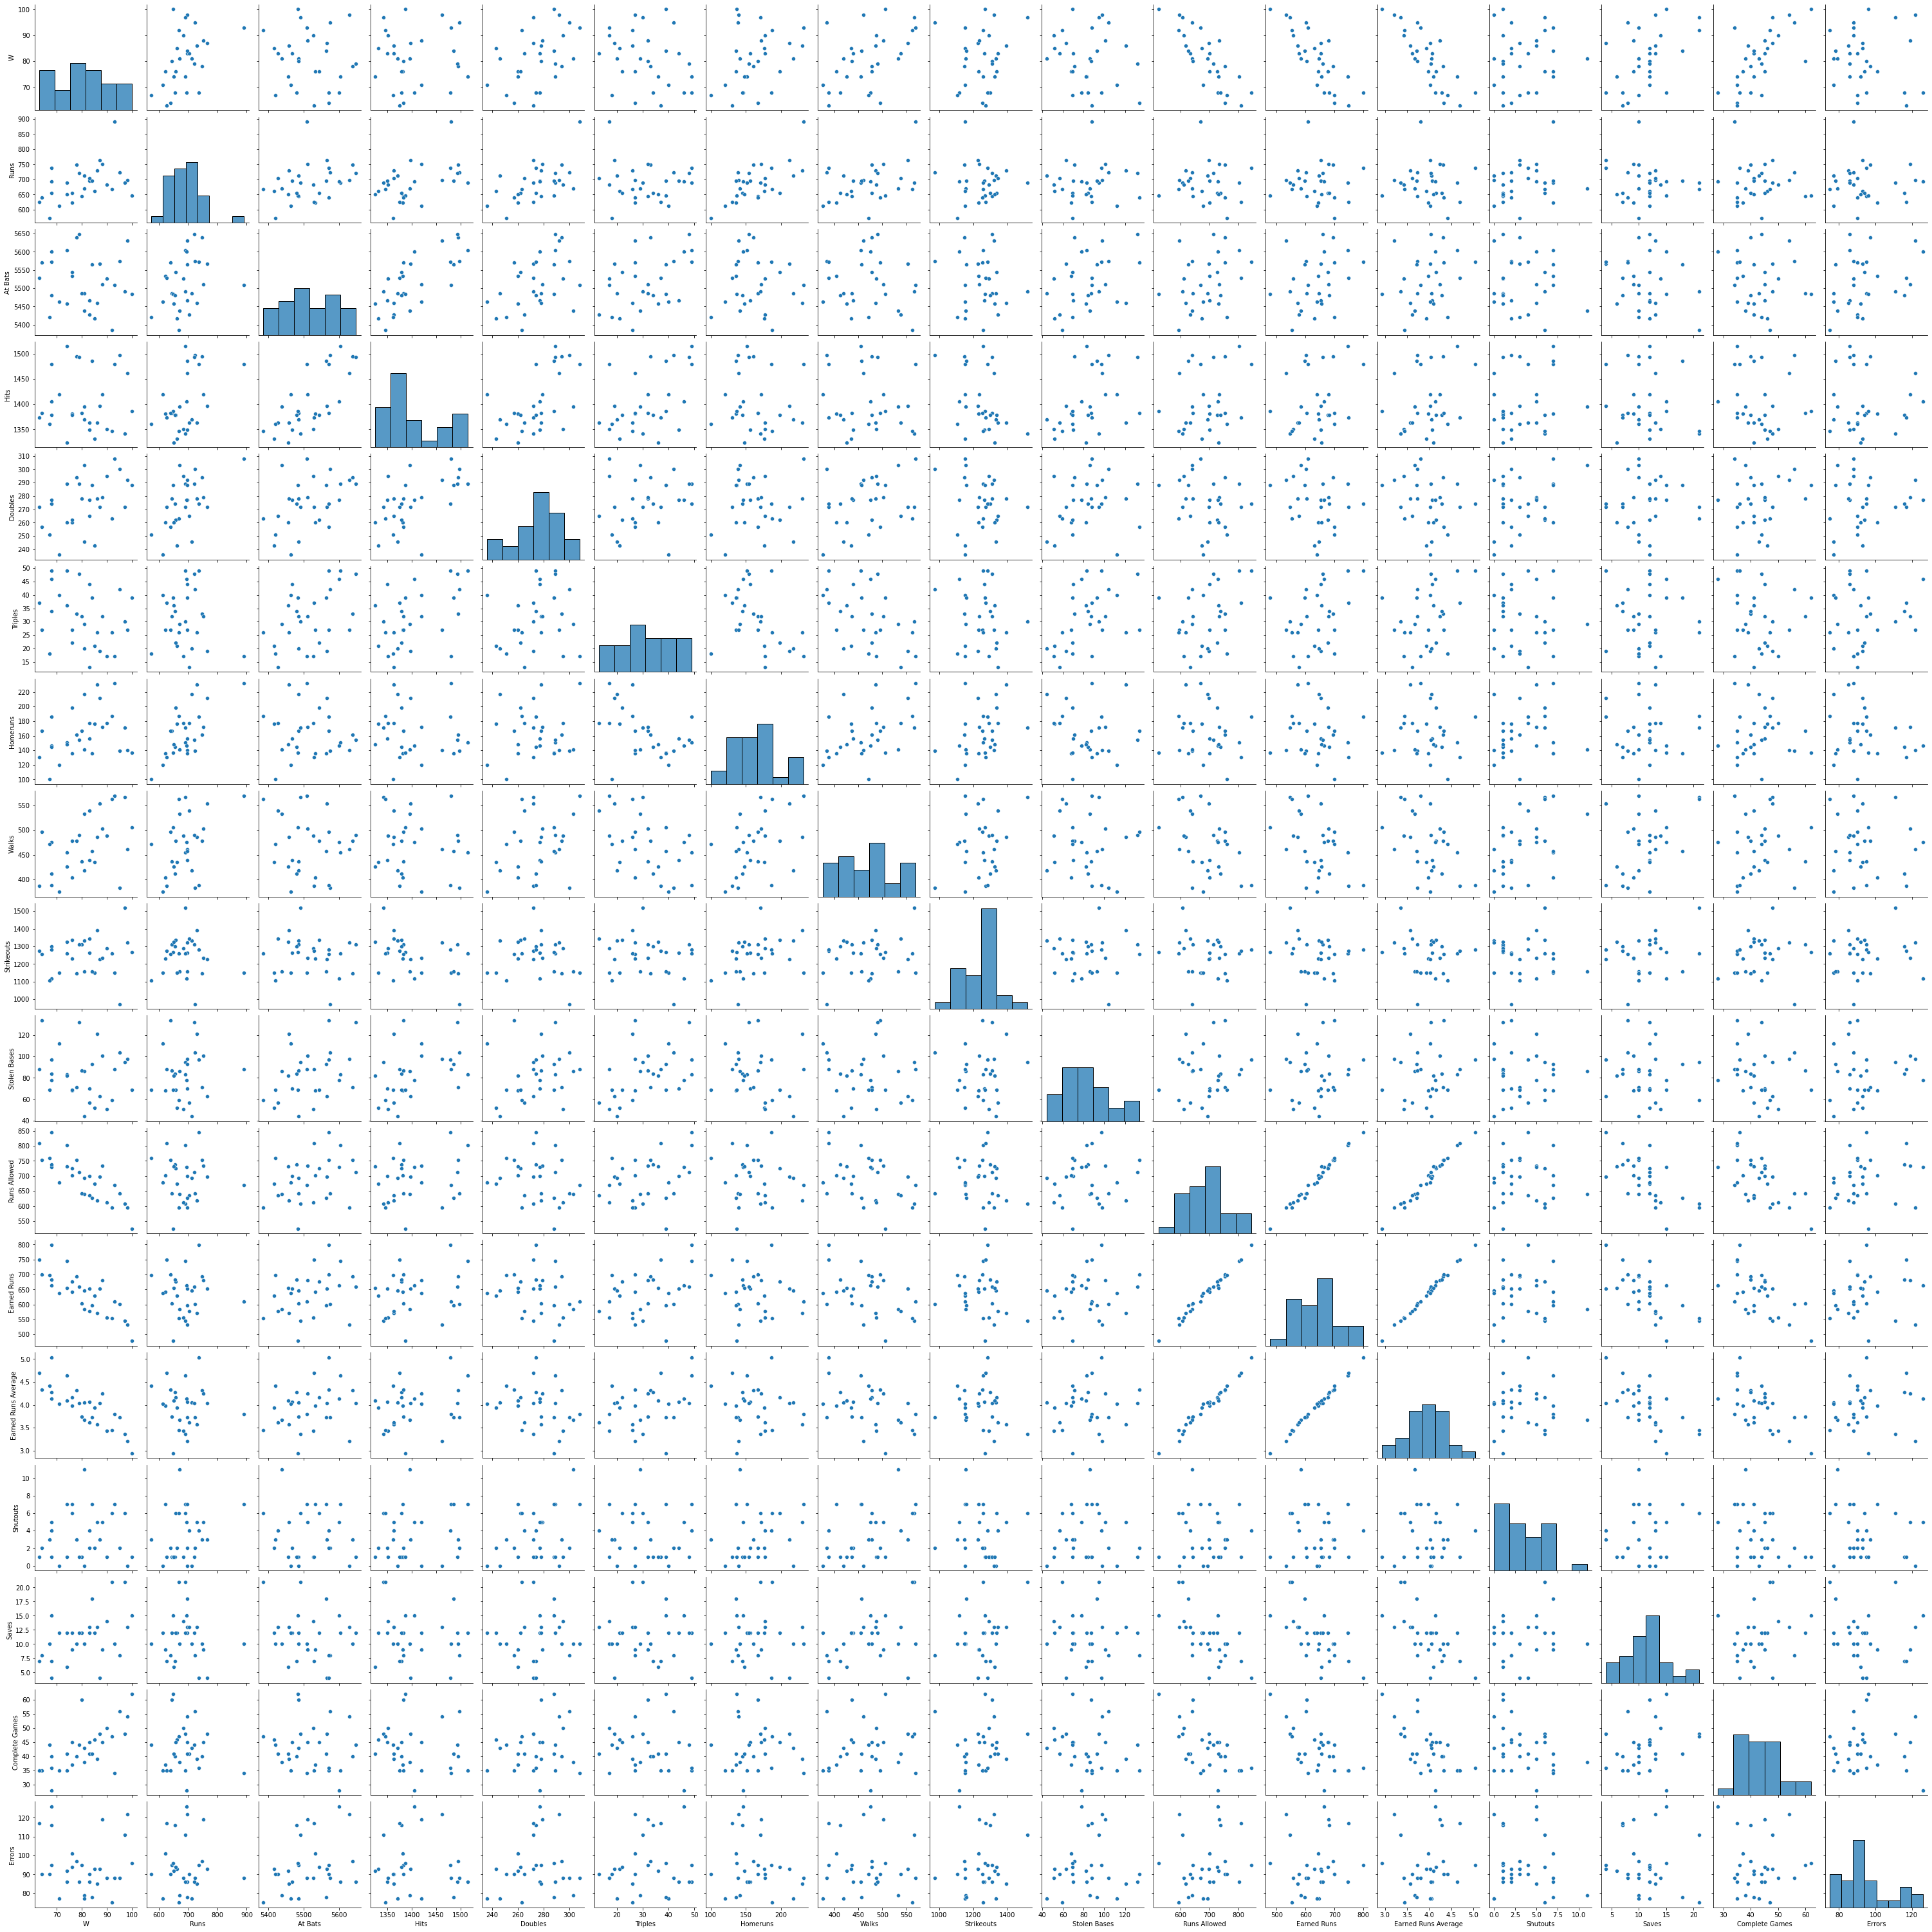

In [54]:
#checking the pair of each column (variable) in dataset

sns.pairplot(df)

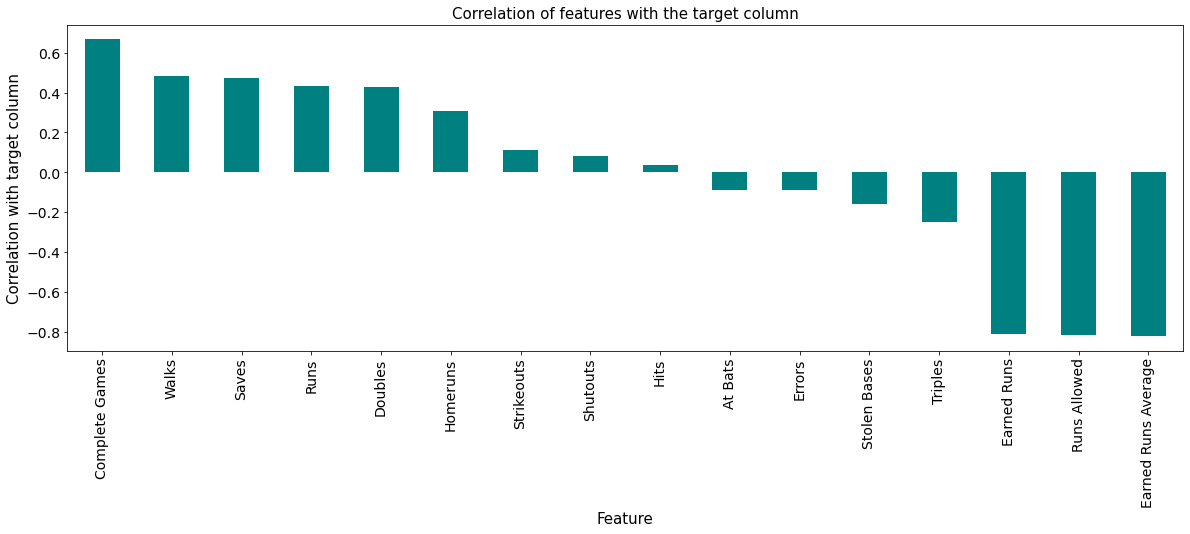

In [55]:
plt.figure(figsize=(20,6))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='teal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Correlation with target column',fontsize=15)
plt.title('Correlation of features with the target column',fontsize=15)
plt.show()

We can see that, Complete Games has highest correlation with the target column 'W', whereas Earned Runs Average has lowest correlation to the target column

# Removing Outliers:

In [56]:
from scipy.stats import zscore

In [57]:
z=np.abs(zscore(df))

In [58]:
z.shape

(30, 17)

In [59]:
#we are taking threshold=3
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [60]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)                     #shape of dataset with outliers
print(df_new.shape)                 #shape of new dataset without outliers

(30, 17)
(29, 17)


In [61]:
df_new

,W,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Shutouts,Saves,Complete Games,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


# Percentage Data loss:

In [62]:
Data_loss=((30-29)/30)*100
Data_loss

3.3333333333333335

We will try for IQR.

In [63]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

W                       13.7500
Runs                    67.0000
At Bats                106.0000
Hits                    88.5000
Doubles                 26.5000
Triples                 16.0000
Homeruns                36.7500
Walks                   73.0000
Strikeouts             154.0000
Stolen Bases            27.5000
Runs Allowed            96.2500
Earned Runs             92.0000
Earned Runs Average      0.5375
Shutouts                 4.7500
Saves                    4.0000
Complete Games           9.5000
Errors                  10.7500
dtype: float64


In [64]:
df_new1=df[-((df<(Q1-1.5*IQR)) |(df>(Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1.shape)

(20, 17)


In [65]:
percentage_loss=(30-20)/30*100
print(percentage_loss)

33.33333333333333


Since the percentage loss in zscore is less (3.33%), we will go with zscore over IQR. 

# Dividing data in features and vectors:

In [66]:
x=df_new.drop(columns=['W'])    #taking all independent variable into x
y=df_new['W']                   #taking dependent variable into y

In [67]:
x.shape

(29, 16)

In [68]:
y.shape

(29,)

# Transforming data to remove skewness:

In [69]:
x.skew()

Runs                  -0.215364
At Bats                0.169573
Hits                   0.783772
Doubles               -0.335304
Triples                0.090124
Homeruns               0.450862
Walks                  0.151193
Strikeouts            -0.233815
Stolen Bases           0.494966
Runs Allowed           0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
Shutouts               0.854980
Saves                  0.526943
Complete Games         0.627480
Errors                 0.840271
dtype: float64

In [70]:
# Checking the skewness of all independent variables
# Mostly all columns are highly skewed, Normal Range = +0.5 to -0.5

# Using power_transform to remove skewness:

In [71]:
from sklearn.preprocessing import power_transform

# Importing Power Transform function to treat the skewness in the Dataset

In [72]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

# Applying power_transform function and making new data frame of modified skewness dataset

In [73]:
df_new.skew()
# New and improved skewness is what we are getting after applying power_transform function

Runs                  -0.024842
At Bats                0.000000
Hits                   0.000000
Doubles               -0.052793
Triples               -0.075139
Homeruns               0.000448
Walks                 -0.008572
Strikeouts             0.051530
Stolen Bases          -0.009570
Runs Allowed          -0.011974
Earned Runs           -0.004988
Earned Runs Average   -0.000401
Shutouts              -0.045947
Saves                  0.000529
Complete Games        -0.000925
Errors                 0.065585
dtype: float64

In [74]:
x=df_new 

# Saving the df_new variable in x as it contains the transformed data 

In [75]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [76]:
x.shape

(29, 16)

In [77]:
y.shape

(29,)

In [78]:
x

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Runs Average,Shutouts,Saves,Complete Games,Errors
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.153276,0.121871,-2.064039,0.677176,0.082858
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,0.197363,-1.732896,-0.252844,0.052325,-1.588197
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.487168,-0.870682,0.236737,1.908137,0.237592
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.769577,0.121871,-0.252844,-0.365006,0.383386
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.615685,0.770649,-0.513555,0.312020,1.554265


# Applying standard scaler:

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

In [80]:
print(x.shape)
print(y.shape)

(29, 16)
(29,)


# Importing libraries

# Building Model using Linear Regression:-

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Importing the Algorithms and Evolution Matrix

# Finding Best Random State:-

In [83]:
# Train Test Split / finding best random_state for my model
lr=LinearRegression() 
for i in range(0,500):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.2)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('*'*50,'\n')

At random state  133 The model performance very well
At random state:  133
Test R2 score is:  0.94
Train R2 score is:  0.94
************************************************** 



We got our best random state 133 which is giving us best accuracy score of 94%

# Creating train test split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=133)
lr.fit(x_train,y_train)
# Splitting the data into train and test using best random state

LinearRegression()

In [85]:
x_train.shape

(23, 16)

In [86]:
x_test.shape

(6, 16)

In [87]:
y_train.shape

(23,)

In [88]:
y_test.shape

(6,)

# Importing different models 

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
lr= LinearRegression()                                    #instances for all the model
rd= Ridge()
ls= Lasso()
dtr= DecisionTreeRegressor()
svr= SVR()
knr= KNeighborsRegressor()
rfr= RandomForestRegressor()
el= ElasticNet()
bag=BaggingRegressor()
ada=AdaBoostRegressor()
gb= GradientBoostingRegressor()

model=[lr,rd,ls,dtr,svr,knr,rfr,el,bag,ada,gb]           #making list of all the models 

In [91]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 2.053494465879678
mean_square_error of LinearRegression() model 7.1911070967661805
R2 Score of LinearRegression() model 93.93013234505082
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 3.109605639725219
mean_square_error of Ridge() model 12.927317007753095
R2 Score of Ridge() model 89.08831389732447
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 4.037725923141051
mean_square_error of Lasso() model 23.48585265218256
R2 Score of Lasso() model 80.17606810132304
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 5.833333333333333
mean_square_error of DecisionTreeRegressor() model 51.833333333333336
R2 Score of DecisionTreeRegressor() model 56.24853458382181
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 8.505655355824643
mean_square_error of SVR() model 9

# Cross Validation :

In [92]:
from sklearn.model_selection import cross_val_score    # Importing the Cross Validation Score from Sklearn Library

In [93]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='neg_mean_squared_error').mean())
    print('$'*50)

mean_square of  LinearRegression() model 7.1911070967661805
cross Validation score of  LinearRegression()  is  -36.26103122752789
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
mean_square of  Ridge() model 12.927317007753095
cross Validation score of  Ridge()  is  -22.60919138420016
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
mean_square of  Lasso() model 23.48585265218256
cross Validation score of  Lasso()  is  -22.166137101036774
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
mean_square of  DecisionTreeRegressor() model 51.833333333333336
cross Validation score of  DecisionTreeRegressor()  is  -100.12000000000002
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
mean_square of  SVR() model 97.5801432397779
cross Validation score of  SVR()  is  -94.76332131929325
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
mean_square of  KNeighborsRegressor() model 71.14
cross Validation score of  KNeighborsRegressor()  is  -53.376
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [94]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,x,y,cv=5, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 2.6816239663245445
cross Validation score of root mean square  LinearRegression()  is  6.021713313296132
**************************************************
Root mean_square of  Ridge() model 3.595457830061854
cross Validation score of root mean square  Ridge()  is  4.754912342430737
**************************************************
Root mean_square of  Lasso() model 4.846220450225367
cross Validation score of root mean square  Lasso()  is  4.708092724345685
**************************************************
Root mean_square of  DecisionTreeRegressor() model 7.199537022151725
cross Validation score of root mean square  DecisionTreeRegressor()  is  11.522441870830448
**************************************************
Root mean_square of  SVR() model 9.87826620616077
cross Validation score of root mean square  SVR()  is  9.734645413125907
**************************************************
Root mean_square of  KNeighborsRegressor() model 8.434

# Hyperparameter tuning of SVR model

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
params= {'kernel':['linear', 'poly', 'rbf'] ,
 'gamma':['scale', 'auto','float'] ,
 'max_iter' : np.arange(2,10) ,
 'degree'   : np.arange(2,10)}                          # Taking all the Parameters to test best Accuracy possible

In [97]:
GCV= GridSearchCV(svr,params,cv=5)

In [98]:
GCV.fit(x_train,y_train)                                # Training the GridSearchCV model to find best parameter

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ['scale', 'auto', 'float'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'max_iter': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [99]:
GCV.best_params_                                        #Printing the best parameters found by GridSearchCV

{'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 9}

In [100]:
GCV_pred=GCV.best_estimator_.predict(x_test)            #predicting with best parameters
print(r2_score(y_test,GCV_pred)) 

#checking final accuracy

0.7002738366158181


In [101]:
# error has been reduced to 70% from 97.58%

# Saving model in pickle format

In [102]:
import joblib
joblib.dump(GCV.best_estimator_,"Baseball.pkl")

['Baseball.pkl']